In [14]:
# imports
import numpy as np
import pandas as pd

from wrangle import wrangle_zillow

import matplotlib.pyplot as plt

Load your zillow dataset.

In [6]:
train, validate, test = wrangle_zillow()

In [7]:
train.columns

Index(['beds', 'baths', 'square_feet', 'tax_value', 'year_built', 'tax_amount',
       'fips'],
      dtype='object')

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.
Here is some sample code to get you started:

In [23]:
from sklearn.linear_model import LinearRegression

#assuming X and y are already defined
model = LinearRegression().fit(train[['square_feet']], train[['tax_value']])
train['yhat'] = predictions = model.predict(train[['square_feet']])

Modify and add to the code above as necessary for it to work with the zillow dataset.

Plot the residuals for the linear regression model that you made.

In [33]:
# residuals requores the baseline, first we will calculate the baseline to plot as a horizontal line
yhat_baseline =  train['baseline'] = train['tax_value'].mean()

In [26]:
# calcualting baseline residuals
train['baseline_residuals'] = train['tax_value'] - train['baseline']

In [27]:
# calculating yhat reiduals
train['yhat_residuals'] = train['tax_value'] - train['yhat']

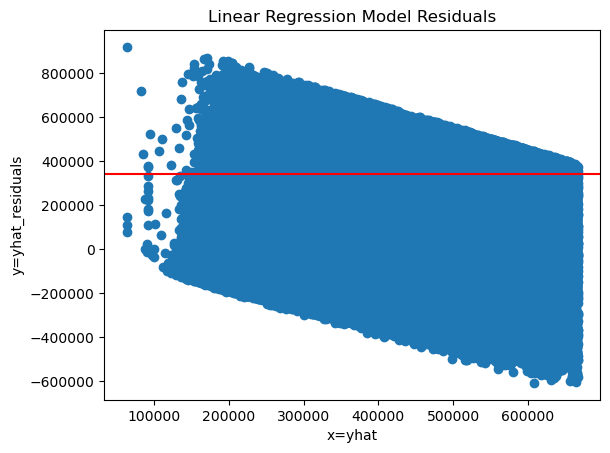

In [39]:
# plotting yhat residuals
plt.scatter(train.yhat, train.yhat_residuals)
plt.axhline(yhat_baseline, c='red')

plt.xlabel('x=yhat')
plt.ylabel('y=yhat_residuals')
plt.title('Linear Regression Model Residuals')
plt.show()

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [42]:
# imports for evaluations
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression

In [40]:
# calculating the residuals squared for the model
train['yhat_residuals_2'] = train.yhat_residuals ** 2

In [43]:
# getting the SSE
yhat_SSE = train.yhat_residuals_2.sum()
SSE = mean_squared_error(train.tax_value, train.yhat) * len(train)

In [73]:
# checking for correctness
SSE == yhat_SSE

True

In [74]:
SSE

3.951120312964445e+16

In [54]:
# getting the explained sum of squares (ESS)
ESS = ((train.yhat - train.tax_value.mean())**2).sum()

# explained variance score is not the same as the explained sum of squares
# ESS = explained_variance_score(train.tax_value, train.yhat)

In [57]:
# getting the total sum of squares
TSS = ((train.tax_value - train.baseline)**2).sum()
TSS = ((train.tax_value - train.tax_value.mean())**2).sum()

In [70]:
# confiming that both methods work correctly
TSS == TSS2

True

In [71]:
TSS

4.9967706701698424e+16

In [61]:
# mean squared error
MSE = SSE / len(train)
MSE2 = mean_squared_error(train.tax_value, train.yhat)

In [68]:
# checking for correctness
MSE == MSE2

True

In [69]:
MSE

36941203595.50516

In [63]:
# root mean squared error
RMSE = MSE ** .5
RMSE2 = mean_squared_error(train.tax_value, train.yhat, squared=False)

In [65]:
# check fo corecctness
RMSE == RMSE2

True

In [66]:
RMSE

192200.94587567763

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [76]:
# calculate rbaseline residuals squared
train['baseline_residuals_2'] = train.baseline_residuals ** 2

In [77]:
# getting the SSE
baseline_SSE = train.baseline_residuals_2.sum()
baseline_SSE2 = mean_squared_error(train.tax_value, train.baseline) * len(train)

In [78]:
# check for correctness
baseline_SSE == baseline_SSE2

True

In [80]:
# show baseline SSE
baseline_SSE

4.9967706701698424e+16


In [82]:
# getting MSE
baseline_MSE = baseline_SSE / len(train)
baseline_MSE2 = mean_squared_error(train.tax_value, train.baseline)

In [83]:
# checking
baseline_MSE == baseline_MSE2

True

In [85]:
# show baseline MSE
baseline_MSE

46717565658.81469

In [88]:
# calculating the root mean of squared error
baseline_RMSE = baseline_MSE ** .5
baseline_RMSE2 = mean_squared_error(train.tax_value, train.baseline, squared=False)

# check for correctness
if baseline_RMSE == baseline_RMSE2:
    print(baseline_RMSE)

216142.46611625096


Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [89]:
if SSE < baseline_SSE:
    print(f'The model performs better than the baseline based on a lower model SSE of {SSE}.\nThe baseline and model SSE have a difference of {baseline_SSE - SSE}')

The model performs better than the baseline based on a lower model SSE of 3.951120312964445e+16.
The baseline and model SSE have a difference of 1.0456503572053976e+16


What is the amount of variance explained in your model?

In [93]:
# two ways, it seems the scikitlearn calculates a more precise score
ESS/TSS, explained_variance_score(train.tax_value, train.yhat)

(0.209265228730142, 0.20926522873019016)

Is your model better than the baseline model?

In [97]:
# Yes because of the reduce amount of error

Create a file named evaluate.py that contains the following functions.
* plot_residuals(y, yhat): creates a residual plot

In [102]:

def plot_residuals(train, y='', yhat=''):
    '''
    Arguments: 
        1. train dataset
        2. y: the column name for the actual outcomes
        3. yhat: the column name for the predicted outcomes
    Actions:
        1. Creates a columns in the train dataset to hold the residuals
        2. Plots the residuals with labels
    Modules:
        1. import pandas as pd
        2. import matplotlib.pyplot as plt
    '''
    # adding a residuals column to train
    train['yhat_residuals'] = train[y] - train[yhat]

    # plotting yhat residuals
    plt.scatter(train[yhat], train.yhat_residuals)
    plt.axhline(yhat_baseline, c='red')
    
    # labeling the axes
    plt.xlabel('x=yhat')
    plt.ylabel('y=yhat_residuals')
    # labeling the chart
    plt.title('Linear Regression Model Residuals')
    plt.show()
    
    return

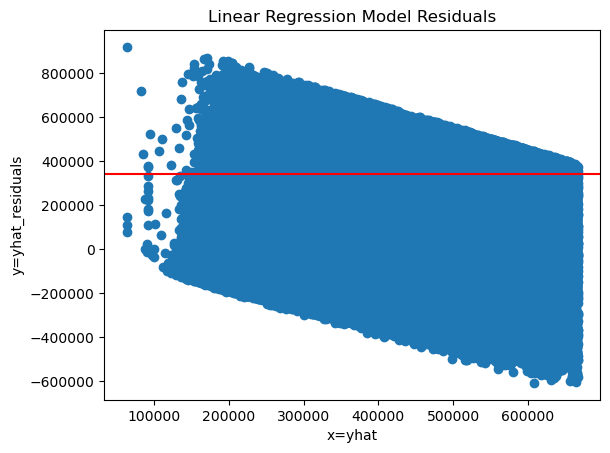

In [101]:
# testing
plot_residuals(train, y='tax_value', yhat='yhat')

* regression_errors(y, yhat): returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)

In [131]:
def regression_errors(train, y, yhat):
    '''
    Arguments: 
        1. train dataset
        2. y: the column name that holds the actual outcomes
        3. yhat: the column name that holds the predicted outcomes
    Actions:
        1. Computes the SSE, ESS, TSS, MSE, and RMSE for a model
    Returns:
        1. Display of SSE, ESS, TSS, MSE, and RMSE
    Modules:
        1. import pandas as pd
        2. import matplotlib.pyplot as plt
    '''
    # calculate the sum of squared errors
    SSE = mean_squared_error(train[y], train[yhat]) * len(train)
    
    # calculate the explained sum of squared error
    ESS = ((train[yhat] - train[y].mean())**2).sum()
    
    # calculate the total sum of squared error
    TSS = ((train[y] - train[y].mean())**2).sum()
    
    # calculate the meas squared error
    MSE = mean_squared_error(train[y], train[yhat])
    
    # calculate the root mean sqaured error
    RMSE = mean_squared_error(train[y], train[yhat], squared=False)
    
    print(f'''Model Metrics
    SSE = {SSE}
    ESS = {ESS}
    TSS = {TSS}
    MSE = {MSE}
    RMSE = {RMSE}
    ''')
    
    return RMSE

In [111]:
# Testing
regression_errors(train, y='tax_value', yhat='yhat')

Model Metrics
    SSE = 3.951120312964445e+16
    ESS = 1.045650357205157e+16
    TSS = 4.9967706701698424e+16
    MSE = 36941203595.50516
    RMSE = 192200.94587567763
    


In [107]:
SSE, ESS, TSS, MSE, RMSE

(3.951120312964445e+16,
 1.045650357205157e+16,
 4.9967706701698424e+16,
 36941203595.50516,
 192200.94587567763)

* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [137]:
def baseline_mean_errors(train, y=''):
    '''
    Arguments: 
        1. train dataset
        2. y: the column name that holds the actual outcomes
    Actions:
        1. Creates a column in the train dataset to hold the baseline dataset
        2. Computes the SSE, MSE, and RMSE for the baseline model
    Returns:
        1. Displays the SSE, MSE, and RMSE for the baseline model
    Modules:
        1. import pandas as pd
        2. from sklearn.metrics import mean_squared_error
    '''
    train['baseline'] = train[y].mean()
    
    # calculate the baseline sum of squared errors
    baseline_SSE = mean_squared_error(train[y], train['baseline']) * len(train)
    
    # calculate the baseline mean of squared error
    baseline_MSE = mean_squared_error(train[y], train['baseline'])
    
    # calculate the root mean of squared error
    baseline_RMSE = mean_squared_error(train[y], train['baseline'], squared=False)
    
    # print results
    print(f'''Baseline Model Metrics
    SSE = {baseline_SSE}
    MSE = {baseline_MSE}
    RMSE = {baseline_RMSE}
    ''')
    
    # exit function
    return baseline_RMSE

In [127]:
# testing
baseline_mean_errors(train, y='tax_value')

Model Metrics
    SSE = 4.9967706701698424e+16
    MSE = 46717565658.81469
    RMSE = 216142.46611625096
    


216142.46611625096

In [125]:
# checking
baseline_SSE, baseline_MSE, baseline_RMSE

(4.9967706701698424e+16, 46717565658.81469, 216142.46611625096)

* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [140]:
def better_than_baseline(train, y='', yhat=''):
    '''
    
    
    '''
    
    return baseline_mean_errors(train, y=y) > regression_errors(train, y=y, yhat=yhat) 

In [141]:
better_than_baseline(train, y='tax_value', yhat='yhat')

Baseline Model Metrics
    SSE = 4.9967706701698424e+16
    MSE = 46717565658.81469
    RMSE = 216142.46611625096
    
Model Metrics
    SSE = 3.951120312964445e+16
    ESS = 1.045650357205157e+16
    TSS = 4.9967706701698424e+16
    MSE = 36941203595.50516
    RMSE = 192200.94587567763
    


True